In [327]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
dataset = pd.read_csv("cardio_train.csv", sep=";")

# Data exploration

In [329]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


The `id` column is not relevant for prediction, it's only an index to identify records.  
With `set_index` we set the `id` column as pandas identifier.

In [330]:
dataset.set_index('id', inplace=True)
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Features types and mean

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

There are some `null` records?

In [331]:
dataset.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [332]:
dataset.shape

(70000, 12)

As described in the dataset we have 12 features (included the predict feature) and 70000 records.

In [333]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We can see `ap_hi` and `ap_lo` have a min **negative** value and this is not good for the model.

In [334]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(dataset[dataset['ap_lo'] > dataset['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 1234 cases


In [335]:
# Credit: https://www.kaggle.com/sulianova/eda-cardiovascular-data
dataset.drop(dataset[(dataset['ap_hi'] > dataset['ap_hi'].quantile(0.975)) | (dataset['ap_hi'] < dataset['ap_hi'].quantile(0.025))].index, inplace=True)
dataset.drop(dataset[(dataset['ap_lo'] > dataset['ap_lo'].quantile(0.975)) | (dataset['ap_lo'] < dataset['ap_lo'].quantile(0.025))].index, inplace=True)

In [336]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(dataset[dataset['ap_lo'] > dataset['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 0 cases


In [337]:
# Credit: https://www.kaggle.com/sulianova/eda-cardiovascular-data
dataset.drop(dataset[(dataset['height'] > dataset['height'].quantile(0.975)) | (dataset['height'] < dataset['height'].quantile(0.025))].index, inplace=True)
dataset.drop(dataset[(dataset['weight'] > dataset['weight'].quantile(0.975)) | (dataset['weight'] < dataset['weight'].quantile(0.025))].index, inplace=True)

Remove ap_lo, ap_hi < 0

In [338]:
dataset.drop(dataset[dataset['ap_hi'] <= 0].index, inplace=True)
dataset.drop(dataset[dataset['ap_lo'] <= 0].index, inplace=True)
dataset.drop(dataset[dataset['height'] > 220].index, inplace=True)

In [339]:
dataset['age'] = (dataset['age'] / 365).round().astype('int')

In [340]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000,60656.000000
mean,53.360574,1.347731,164.553218,73.473620,126.141338,81.145888,1.353353,1.220671,0.085680,0.052081,0.803630,0.491509
std,6.745132,0.476254,6.833267,11.634443,14.278989,8.312284,0.671666,0.567805,0.279893,0.222191,0.397255,0.499932
min,30.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,180.000000,106.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Dopo la pulizia dei dati, possimo osservare che i valori di pressione `ap_lo` e `ap_hi` sono senza "rumore" o alterazioni.  
L'eta e' stata convertita da giorni in anni (per semplicita' di lettura e a fini statistici).  
E inifine per i valori di pressione, altezza e peso si sono elemininati i valori "estremi", ovvero quelli meno significativi statisticamente.

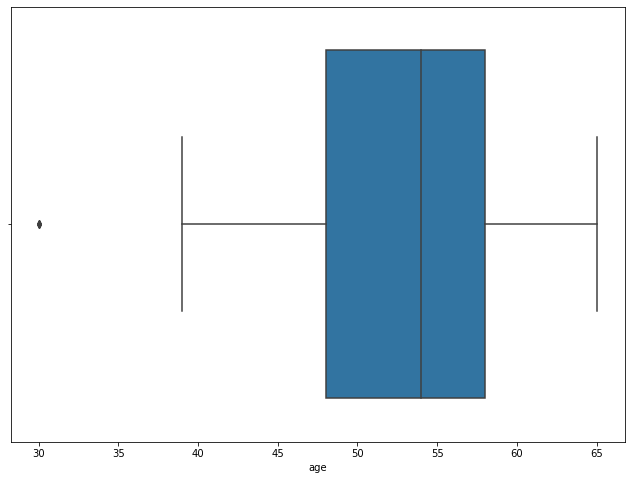

In [341]:
sns.boxplot(x=dataset['age'])

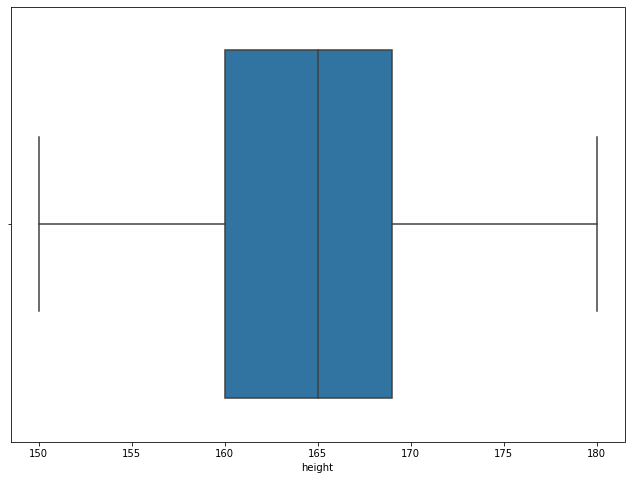

In [342]:
sns.boxplot(x=dataset['height'])

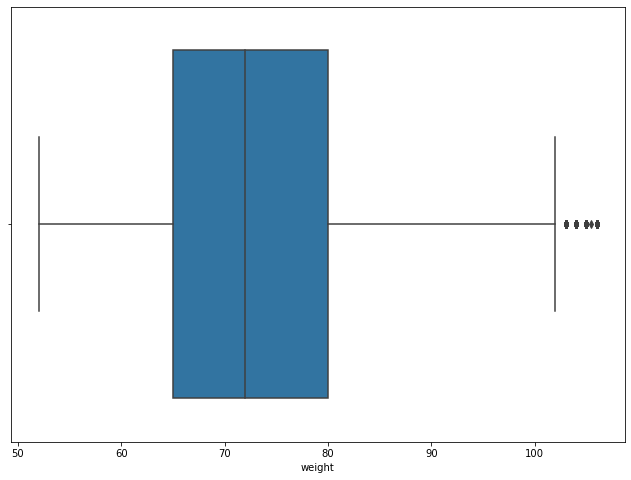

In [343]:
sns.boxplot(x=dataset['weight'])

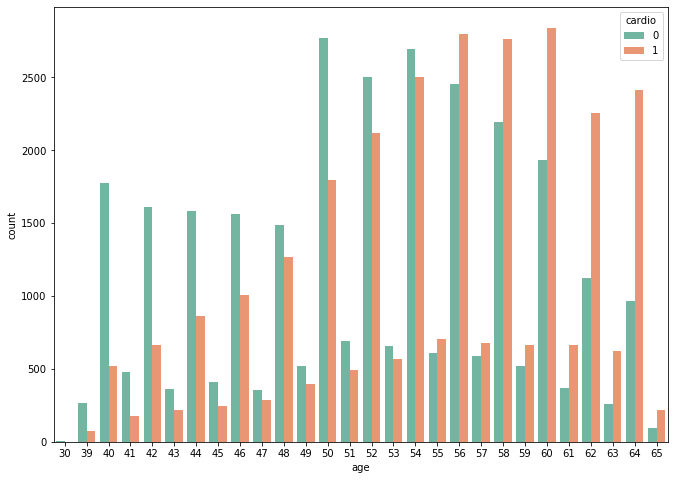

In [344]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = dataset, palette="Set2");

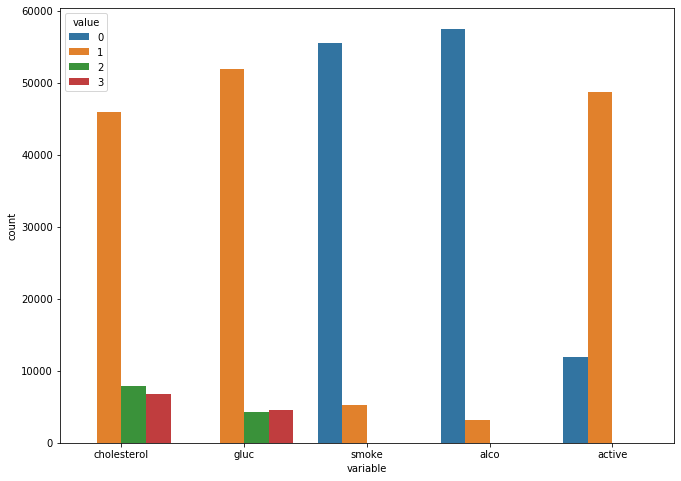

In [345]:
df_categorical = dataset.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value", data= pd.melt(df_categorical));

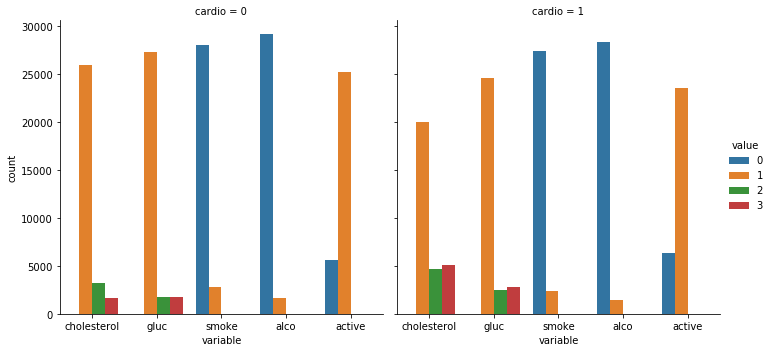

In [346]:
df_long = pd.melt(dataset, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count");

In [347]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(dataset, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

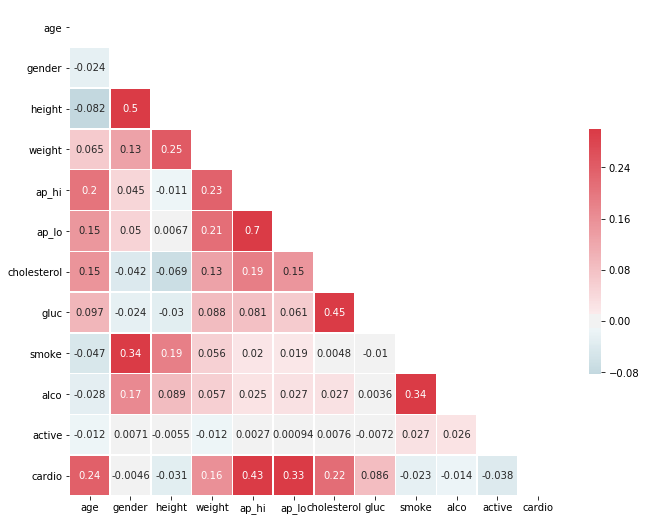

In [348]:
plot_correlation(dataset.corr())

## Note

- Cardio con ap_hi (persone con pressione alta + possib. di problemi)


In [349]:
dataset['bmi'] = (dataset['weight'] / (dataset['height'] / 100)**2)

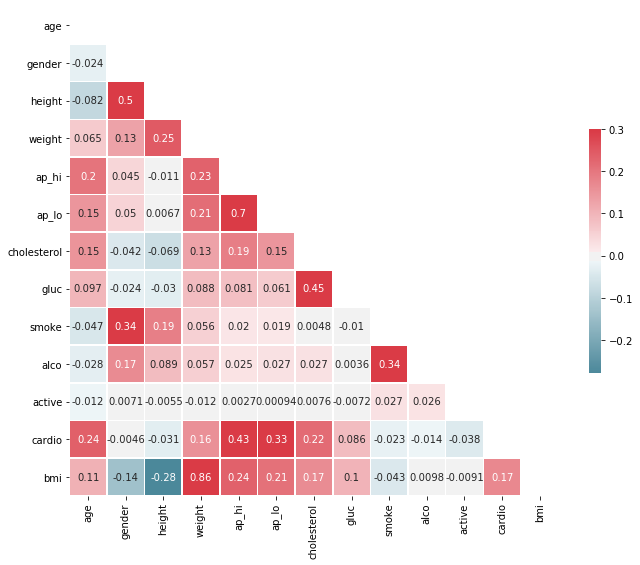

In [350]:
plot_correlation(dataset.corr())

In [351]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']
target = ['cardio']

In [352]:
categorical_features = ['gender', 'cholesterol', 'gluc']

In [353]:
dataset = pd.get_dummies(dataset, columns=categorical_features, prefix=categorical_features)

In [354]:
dataset.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,,
0,50,168,62.0,110,80,0,0,1,0,21.967120,0,1,1,0,0,1,0,0
1,55,156,85.0,140,90,0,0,1,1,34.927679,1,0,0,0,1,1,0,0
2,52,165,64.0,130,70,0,0,0,1,23.507805,1,0,0,0,1,1,0,0
3,48,169,82.0,150,100,0,0,1,1,28.710479,0,1,1,0,0,1,0,0
4,48,156,56.0,100,60,0,0,0,0,23.011177,1,0,1,0,0,1,0,0


In [355]:
X = dataset.drop('cardio', axis=1)
y = dataset['cardio']

# Outliers

In [356]:
from pyod.models.knn import KNN

In [357]:
outl_model = KNN(contamination=0.02, n_jobs=-1)

outl_model.fit(X)
scores_pred = outl_model.decision_function(X) * -1

In [358]:
# prediction of a datapoint category outlier or inlier
y_pred = outl_model.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

dfx = dataset
dfx['outlier'] = y_pred.tolist()

In [359]:
print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers)

OUTLIERS :  946 INLIERS :  59710


In [360]:
print(X.shape)
X.drop(X[dfx['outlier'] == 1].index, inplace=True)
y.drop(y[dfx['outlier'] == 1].index, inplace=True)
print(X.shape)

(60656, 17)
(59710, 17)


In [361]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X.astype(float), y, test_size=0.3, random_state=43)

# Perceptron

In [362]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Perceptron with standard scaler
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

std_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_perceptron.score(X_val, y_val)*100))

Accuracy on train 64.66%
Accuracy on val 64.43%


In [363]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

poly_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(poly_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(poly_perceptron.score(X_val, y_val)*100))

Accuracy on train 66.03%
Accuracy on val 65.65%


# Logistic Regression

In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(penalty='l2', solver='lbfgs', tol=1e-2, C=1, random_state=43, multi_class='ovr', n_jobs=-1))
])

std_lr.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_lr.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_lr.score(X_val, y_val)*100))

Accuracy on train 72.20%
Accuracy on val 72.38%


# Gaussian Naive Bayes

In [365]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_gnb = Pipeline([
    ('std', StandardScaler()),
    ('gnb', GaussianNB(var_smoothing=0.001))
])

std_gnb.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_gnb.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_gnb.score(X_val, y_val)*100))

Accuracy on train 68.00%
Accuracy on val 67.92%


# K Nearest Neighbour

In [366]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_knn = Pipeline([
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15, leaf_size=70, algorithm='auto', n_jobs=-1))
])

std_knn.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_knn.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_knn.score(X_val, y_val)*100))

Accuracy on train 74.31%
Accuracy on val 71.41%


# SVM

In [367]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC(gamma='auto', kernel='rbf'))
])

std_svm.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_svm.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_svm.score(X_val, y_val)*100))

Accuracy on train 73.23%
Accuracy on val 72.84%


## GridSearch SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    'svm__kernel': ['rbf'],
    'svm__C': (1, 0.25, 0.5, 0.75),
    'svm__gamma': (1, 2, 3, 'auto'),
}

gs_svm = GridSearchCV(std_svm, grid, cv=3, n_jobs=-1, return_train_score=True)
gs_svm.fit(X_train, y_train)

In [ ]:
pd.DataFrame(gs_svm.cv_results_).sort_values('rank_test_score').head(5)

In [368]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_estimators=500, n_jobs=-1))
])

rfc.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(rfc.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(rfc.score(X_val, y_val)*100))

Accuracy on train 97.42%
Accuracy on val 70.57%


In [370]:
pred = rfc.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      9208
           1       0.70      0.68      0.69      8705

    accuracy                           0.71     17913
   macro avg       0.71      0.71      0.71     17913
weighted avg       0.71      0.71      0.71     17913



# XGBoost

In [371]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('svm', XGBClassifier(nthread=8, n_estimators=1000, objective='binary:logistic', early_stopping_rounds=10, eta=0.5, min_child_weight=3))
])

std_xgb.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_xgb.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_xgb.score(X_val, y_val)*100))

Accuracy on train 74.50%
Accuracy on val 73.06%


# Voting classifier

In [372]:
from sklearn.ensemble import VotingClassifier

eclf2 = VotingClassifier(estimators=[('xgb', std_xgb), ('lr', std_lr), ('knn', std_knn)], voting='soft')
eclf2.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              Pipeline(memory=None,
                                       steps=[('std',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('svm',
                                               XGBClassifier(base_score=0.5,
                                                             booster='gbtree',
                                                             colsample_bylevel=1,
                                                             colsample_bynode=1,
                                                             colsample_bytree=1,
                                                             early_stopping_rounds=10,
                                                             eta=0.5, gamma=0,
       

In [373]:
print('Accuracy on train {:.2f}%'.format(eclf2.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(eclf2.score(X_val, y_val)*100))

Accuracy on train 74.39%
Accuracy on val 72.83%


In [374]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.ylim([0,2])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.ylim([0.4, 1])
    plt.legend()
    plt.show()

In [378]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D

scaler_X = StandardScaler()
std_X_train = scaler_X.fit_transform(X_train.astype(float))
std_X_val = scaler_X.transform(X_val)

std_y_train = to_categorical(y_train)
std_y_val = to_categorical(y_val)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

def nn_build_model():
    model = Sequential([
        Dense(11, kernel_initializer='random_uniform', activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        Dense(11, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dense(1, kernel_initializer='random_uniform', activation=tf.nn.sigmoid)
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [379]:
model = nn_build_model()
history = model.fit(std_X_train, y_train, validation_split=0.3, epochs=10, verbose=0, callbacks=[PrintDot()])

W0618 11:33:06.282305 140300603049600 deprecation.py:506] From /usr/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0618 11:33:06.342195 140300603049600 deprecation.py:323] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



..........

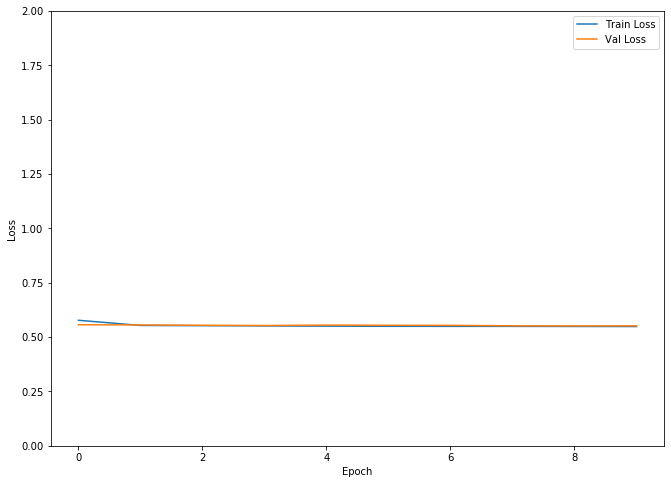

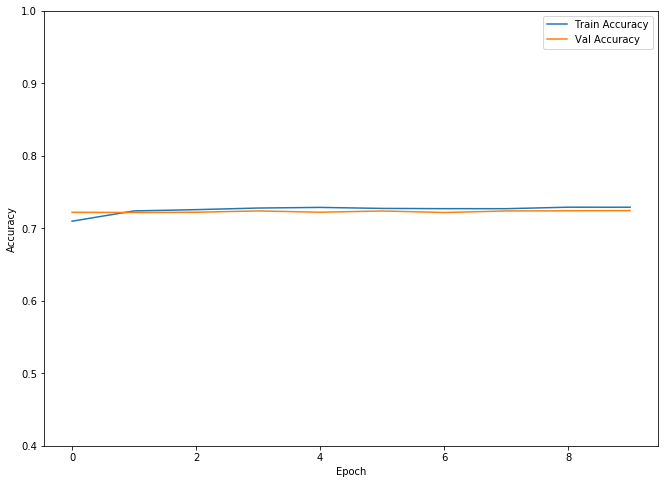

In [380]:
hist = pd.DataFrame(history.history)
plot_history(history)

In [381]:
model.evaluate(scaler_X.transform(X_val), y_val)

17913/17913 [==============================] - 0s 10us/sample - loss: 0.5506 - acc: 0.7300


[0.5505558364735917, 0.73002845]

In [382]:
y_pred = model.predict(scaler_X.transform(X_val))
y_pred =(y_pred > 0.5)

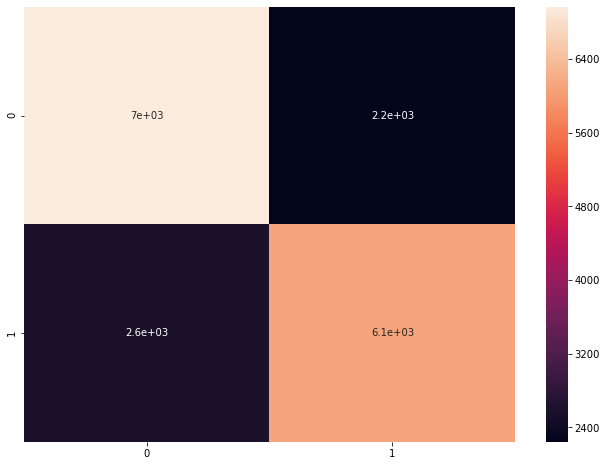

In [383]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True)

In [384]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

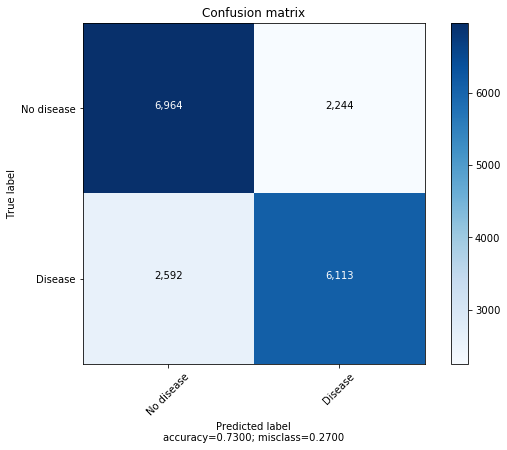

In [385]:
plot_confusion_matrix(cm, target_names=['No disease', 'Disease'], normalize=False)